In [2]:
from keras.datasets import mnist
(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


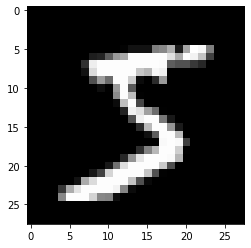

In [6]:
from matplotlib import pyplot as plt
plt.imshow(train_data[0],cmap='gray')
plt.show()

In [9]:
train_target[0]

5

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
model=Sequential()


In [20]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0

In [17]:
from keras.utils import np_utils
new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)
print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [18]:
print(train_target[0])
print(new_train_target[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
new_train_data=train_data/255
new_test_data=test_data/255

In [21]:
model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2956 - accuracy: 0.9119
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1313 - accuracy: 0.9649
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1023 - accuracy: 0.9743 0s - l
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0838 - accuracy: 0.9781
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0713 - accuracy: 0.9821
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0586 - accuracy: 0.9849
Epoch 7/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0521 - accuracy: 0.9862
Epoch 8/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0488 - accuracy: 0.9878
Epoch 9/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0443 - accuracy: 0.9888
Epoch 10/20
1875/1875 [==============================] - 16s 8ms/s

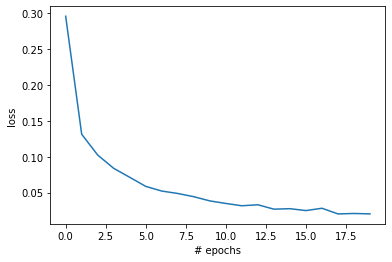

In [23]:
from matplotlib import pyplot as plt
plt.plot(model.history.history["loss"])
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.show()

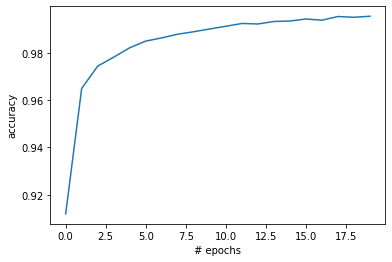

In [24]:
from matplotlib import pyplot as plt
plt.plot(model.history.history["accuracy"])
plt.xlabel("# epochs")
plt.ylabel("accuracy")
plt.show()

In [25]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.1346 - accuracy: 0.9803


[0.13464558124542236, 0.9803000092506409]

In [26]:
model.save_weights("HandWritten-MNIST.h5")

In [41]:
for layer in model.layers:
    print(layer.get_weights())
    
   # print('weights',parameters[0])
    #print('biases',parameters[1])
    print("*********************************************************")

[]
*********************************************************
[array([[-0.00387779,  0.01997983,  0.04689973, ..., -0.04950833,
         0.02754037, -0.04424454],
       [ 0.03446374,  0.01325989, -0.0674414 , ...,  0.03584783,
        -0.01115066, -0.01653982],
       [-0.06332547,  0.05243112, -0.06053721, ..., -0.04449196,
        -0.01790082,  0.02502656],
       ...,
       [ 0.05614021, -0.04111768,  0.02831366, ...,  0.02173658,
        -0.01741762, -0.03847388],
       [ 0.03009667,  0.01217664,  0.01730115, ..., -0.00717334,
        -0.02640885, -0.04956526],
       [ 0.05941871, -0.00527787, -0.00196522, ..., -0.00724875,
         0.00049827, -0.01542927]], dtype=float32), array([-3.26856561e-02, -6.21616989e-02, -2.29353756e-01, -8.84267986e-02,
        1.43584922e-01, -6.15195408e-02, -1.01461709e-01, -1.70827620e-02,
       -3.89171834e-03, -4.50366251e-02, -5.52555323e-02, -4.63997908e-02,
       -5.29178642e-02, -2.03192249e-01,  1.17310964e-01, -1.17203053e-02,
        7

In [42]:
model.save('Handwritten')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Handwritten\assets
